# Evolutionary Computation
### Natural Computing - Assignment 5

## Exercise 5.1: Fitness Function and Selection Pressure

In [1]:
# Required Libraries
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [2]:
# Defining fitness functions
def f1(x):
    return np.abs(x)  # Fitness function f1: absolute value of x


def f2(x):
    return x ** 2  # Fitness function f2: square of x


def f3(x):
    return 2 * x ** 2  # Fitness function f3: twice the square of x


def f4(x):
    return x ** 2 + 20  # Fitness function f4: square of x plus 20

In [3]:
# Defining the individuals
individuals = np.array([2, 3, 4])

# Computing fitness values for each individual and fitness function
fitness_f1 = f1(individuals)
fitness_f2 = f2(individuals)
fitness_f3 = f3(individuals)
fitness_f4 = f4(individuals)

In [4]:
# Calculating the total fitness for each fitness function
total_fitness_f1 = np.sum(fitness_f1)
total_fitness_f2 = np.sum(fitness_f2)
total_fitness_f3 = np.sum(fitness_f3)
total_fitness_f4 = np.sum(fitness_f4)

# Determining selection probabilities for each individual under each fitness function
prob_f1 = fitness_f1 / total_fitness_f1
prob_f2 = fitness_f2 / total_fitness_f2
prob_f3 = fitness_f3 / total_fitness_f3
prob_f4 = fitness_f4 / total_fitness_f4

# Combining the selection probabilities for easier plotting
selection_probabilities = np.array([prob_f1, prob_f2, prob_f3, prob_f4]).T

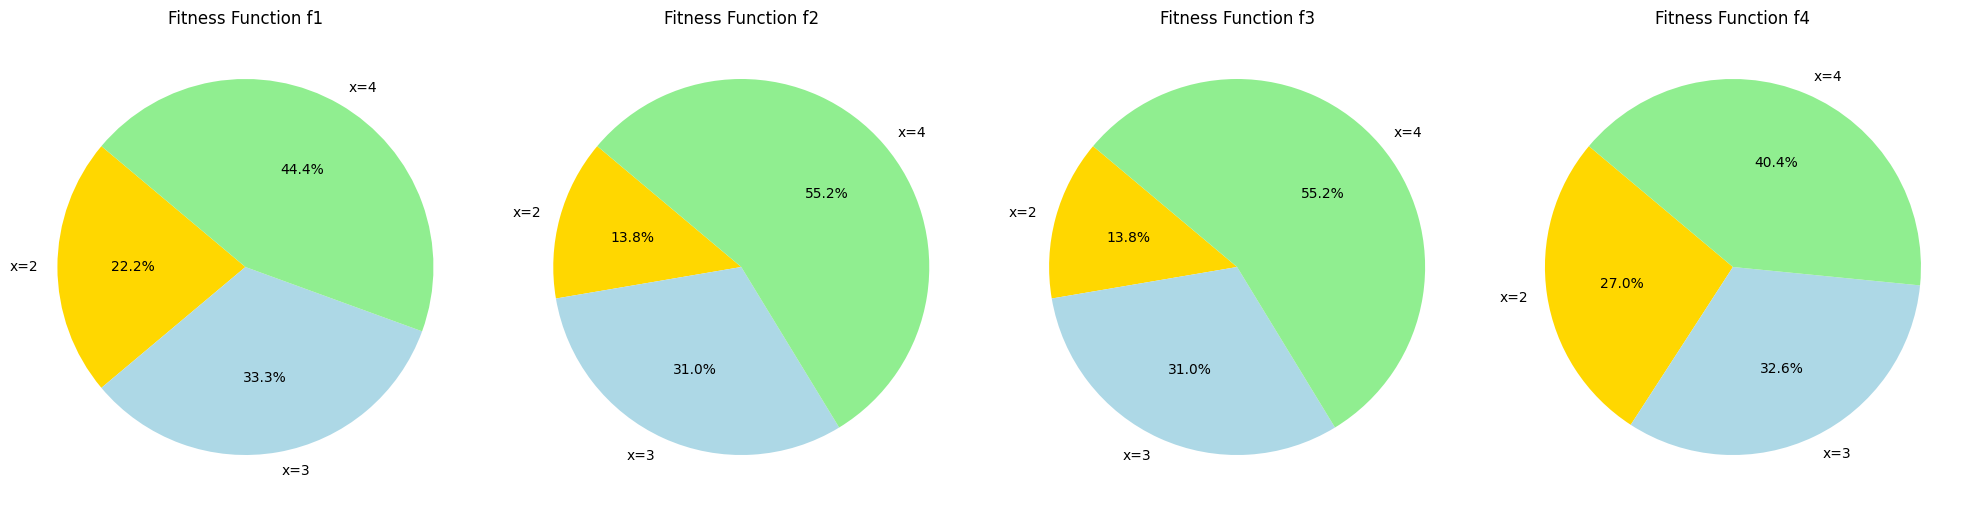

In [5]:
# Function to create pie charts for visualizing selection probabilities
def plot_pie_charts_colored(probabilities, title):
    # Setting up the plot
    fig, axs = plt.subplots(1, 4, figsize=(20, 5))
    labels = ['x=2', 'x=3', 'x=4']
    colors = ['gold', 'lightblue', 'lightgreen']  # Setting colors for visual distinction

    # Creating a pie chart for each fitness function
    for i, ax in enumerate(axs):
        ax.pie(probabilities[:, i], labels=labels, autopct='%1.1f%%', startangle=140, colors=colors)
        ax.set_title(f'Fitness Function {title[i]}')

    plt.tight_layout()
    plt.show()


# Plotting the pie charts for each fitness function
plot_pie_charts_colored(selection_probabilities, ['f1', 'f2', 'f3', 'f4'])

##### **Question 2: What can you conclude about the effects of fitness scaling on selection pressure?**

The pie charts derived from the fitness functions illustrate the effects of fitness scaling on selection pressure:

- **Linear Fitness Function (f1):** The selection pressure is proportional to the value of \( x \). Each individual's chance of being selected is directly tied to their absolute value, leading to a linear relationship between fitness value and selection probability.

- **Quadratic Fitness Functions (f2 and f3):** These functions demonstrate that higher values of \( x \) dramatically increase the selection probability due to the exponential increase in fitness values. Despite \( f3 \) being a scaled version of \( f2 \), the selection probabilities remain unchanged, as the scaling factor uniformly affects all fitness values without altering their proportions.

- **Quadratic Fitness Function with Constant (f4):** When a constant is added to a quadratic function, it does not change the relative selection probabilities significantly. However, the pie chart for \( f4 \) suggests a slight decrease in selection pressure for individuals with higher fitness values compared to \( f2 \) and \( f3 \). This indicates that the addition of a constant term reduces the selection pressure variance among individuals.

These observations imply that fitness scaling significantly impacts selection pressure. Non-linear fitness functions tend to favor individuals with higher fitness, potentially leading to faster convergence but increased risk of premature convergence due to reduced population diversity. In contrast, linear fitness scaling provides a more balanced selection pressure, promoting genetic diversity and potentially resulting in more robust convergence over time.


## Exercise 5.2: Role of Selection in Genetic Algorithms (GAs)

In [6]:
# Importing necessary libraries
import random

#### Original (1+1)-GA Implementation

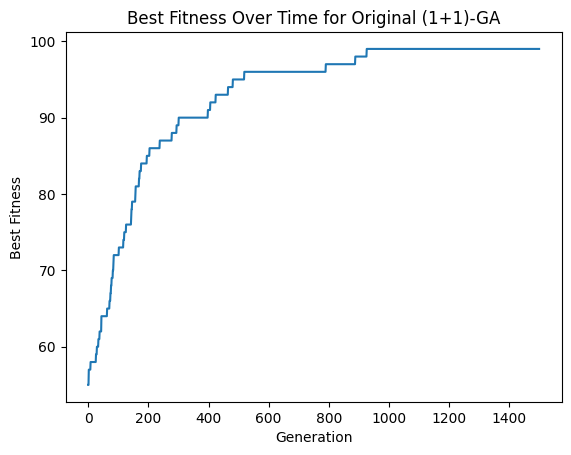

In [7]:
# Define the counting ones function
def counting_ones(l=100, mu=1 / 100, gen=1500):
    # Generate initial random sequence
    seq = [random.choice([0, 1]) for _ in range(l)]
    ones = sum(seq)
    fitness = []

    # Start the genetic algorithm iterations
    for i in range(gen):
        seq_copy = seq.copy()
        # Mutate the copied sequence
        for j in range(l):
            if random.random() < mu:
                seq_copy[j] = 1 - seq_copy[j]
        ones_new = sum(seq_copy)

        # Selection step: keep the sequence with the highest number of ones
        if ones < ones_new:
            ones = ones_new
            seq = seq_copy
        fitness.append(ones)
    return fitness


# Plot the fitness across generations for the original algorithm
plt.plot(counting_ones())
plt.xlabel('Generation')
plt.ylabel('Best Fitness')
plt.title('Best Fitness Over Time for Original (1+1)-GA')
plt.show()

#### Modified (1+1)-GA Implementation

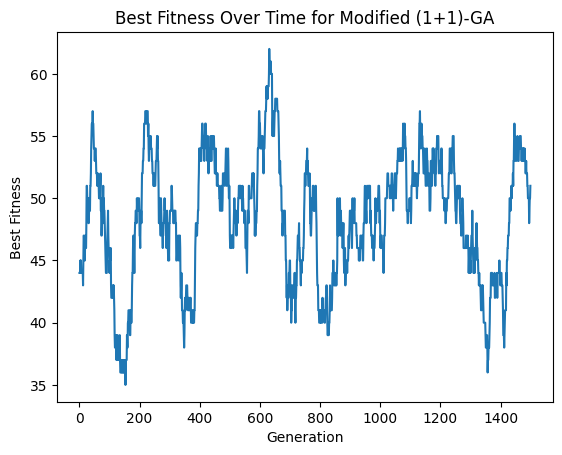

In [8]:
# Define the counting ones function for the modified algorithm
def counting_ones_modified(l=100, mu=1 / 100, gen=1500):
    # Generate initial random sequence
    seq = [random.choice([0, 1]) for _ in range(l)]
    ones = sum(seq)
    fitness = []

    # Start the genetic algorithm iterations
    for i in range(gen):
        seq_copy = seq.copy()
        # Mutate the copied sequence
        for j in range(l):
            if random.random() < mu:
                seq_copy[j] = 1 - seq_copy[j]
        ones = sum(seq_copy)

        # Replace the original sequence with the mutated one unconditionally
        seq = seq_copy
        fitness.append(ones)
    return fitness


# Plot the fitness across generations for the modified algorithm
plt.plot(counting_ones_modified())
plt.xlabel('Generation')
plt.ylabel('Best Fitness')
plt.title('Best Fitness Over Time for Modified (1+1)-GA')
plt.show()


##### **Question 1: Does the algorithm find the optimum?**
Looking at the first plot, which shows the performance of the original (1+1)-GA, we can see a clear trend of increasing fitness over generations. The best fitness value approaches 100, which is the optimum for the Counting Ones problem (since the bit string length is 100). The algorithm does not consistently hit the absolute optimum of 100 but gets very close to it. This indicates that the original (1+1)-GA is effective at finding a high-fitness solution, if not always the absolute best one.

##### **Question 2: What do you see when you compare the original algorithm with the modified one?**
The second plot for the modified (1+1)-GA shows a highly fluctuating fitness over time, indicating that the algorithm fails to consistently improve or maintain fitness. This behavior demonstrates that without a proper selection mechanism, the GA struggles to reliably advance towards the optimal solution. The modified algorithm, which unconditionally replaces the original sequence with the mutated one, lacks the selection pressure needed to guide the search towards higher fitness values. As a result, the algorithm's performance is significantly worse than the original version, which uses a simple selection mechanism to retain the best sequence found so far.

##### **Question 3: Can you conclude anything on the difference between these two versions based on the above results? If yes, why? If not, what should you do to make a fair comparison?**
Based on the plots, we can see that the original algorithm converges to a high fitness value and maintains it, suggesting that it is finding an optimum or near-optimum solution. The modified algorithm, however, shows no sign of convergence, suggesting that it does not find the optimum. This difference is due to the selection mechanism in Step 3, which in the original algorithm ensures only improvements or equally fit solutions are kept, while the modified algorithm accepts any change, whether it's beneficial or not.

To make a fair comparison, multiple runs should be performed for both versions of the algorithm because GA results are stochastic. By averaging the outcomes over multiple runs, we can account for variability and make a statistically valid comparison. However, based on the single runs shown here, it is clear that selection plays a crucial role in the success of genetic algorithms. Without proper selection mechanisms, GAs may struggle to converge to optimal solutions and may exhibit erratic behavior, as seen in the modified algorithm.

##### **Question 4: Using your insights from the previous question, create a figure that demonstrates the performance difference (if any) between the two versions of the algorithm. Is there a difference in performance?**
The combined figure clearly illustrates the performance difference between the two versions of the algorithm. The original (1+1)-GA, which includes a selection step that only accepts new generations if they have better or equal fitness, shows a consistent increase in average best fitness over time, approaching the optimum of 100. This indicates that the original GA is effectively optimizing the solution.

In contrast, the modified (1+1)-GA, which unconditionally accepts all new generations regardless of fitness, fluctuates around a significantly lower average best fitness without showing progress toward the optimum. This behavior demonstrates that without the selective pressure to choose better-performing individuals, the modified GA fails to drive consistent improvement in fitness.

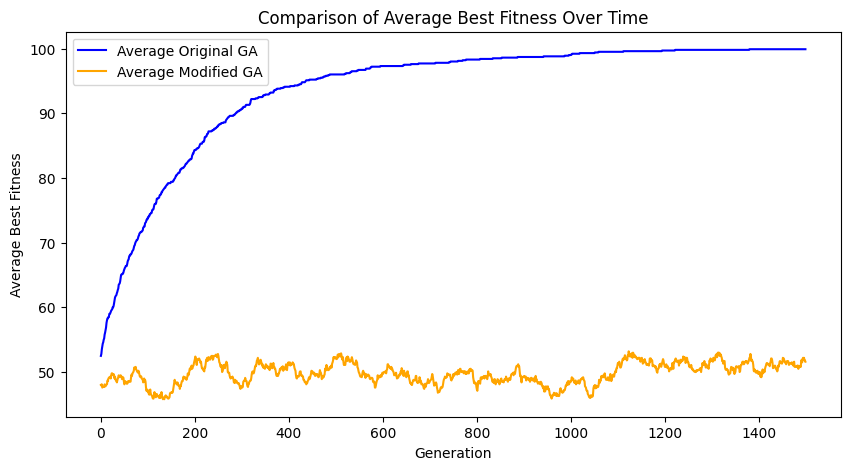

In [10]:
# Define a function to perform multiple runs of the original GA
def multiple_runs_original(n_runs):
    return [counting_ones() for _ in range(n_runs)]


# Define a function to perform multiple runs of the modified GA
def multiple_runs_modified(n_runs):
    return [counting_ones_modified() for _ in range(n_runs)]


# Number of runs for averaging
n_runs = 10

# Perform multiple runs for original and modified GA
fitness_data_original = multiple_runs_original(n_runs)
fitness_data_modified = multiple_runs_modified(n_runs)

# Calculate the average fitness at each generation for original and modified GAs
average_fitness_original = np.mean(fitness_data_original, axis=0)
average_fitness_modified = np.mean(fitness_data_modified, axis=0)

# Plotting both average fitnesses on the same plot for comparison
plt.figure(figsize=(10, 5))

# Plotting the average of the original GA
plt.plot(average_fitness_original, label='Average Original GA', color='blue')

# Plotting the average of the modified GA
plt.plot(average_fitness_modified, label='Average Modified GA', color='orange')

plt.xlabel('Generation')
plt.ylabel('Average Best Fitness')
plt.title('Comparison of Average Best Fitness Over Time')
plt.legend()
plt.show()

## Exercise 5.3: Exploitation versus Exploration and Population Diversity

In [52]:
# Importing necessary libraries
import string

In [122]:
# Combine lowercase and uppercase letters from the English alphabet
alphabet = list(string.ascii_lowercase) + list(string.ascii_uppercase)

# Generate a random target sequence of 15 characters from the alphabet
target_sequence = [random.choice(alphabet) for _ in range(15)]


# Define a fitness function that calculates the match rate between a sequence and the target
def fitness(sequence, target):
    sequence = np.array(sequence)
    target = np.array(target)
    return np.sum(sequence == target) / len(target)


# Define a function to calculate the Hamming distance between two sequences
def hamming_distance(seq1, seq2):
    if len(seq1) != len(seq2):
        raise ValueError(f'Error: length sequence mismatch: {len(seq1)}, {len(seq2)}')
    return sum(s1 != s2 for s1, s2 in zip(seq1, seq2))


# Main genetic algorithm function for string search
def string_search(N=200, K=2, mu=1 / 15, L=15, generations=500, measure_diversity=False):
    # Initialize population
    population = np.array([[random.choice(alphabet) for _ in range(L)] for _ in range(N)])
    target_found = False
    diversity_data = []

    for gen in range(generations):
        new_population = population.copy()

        for i in range(N // 2):
            # Tournament selection for parents
            parent1 = population[np.random.choice(N, K)]
            parent2 = population[np.random.choice(N, K)]
            parent1_max = parent1[np.argmax([fitness(parent1[j], target_sequence) for j in range(K)])]
            parent2_max = parent2[np.argmax([fitness(parent2[j], target_sequence) for j in range(K)])]

            # Crossover
            crossover_point = np.random.randint(0, L)
            child1 = parent1_max.copy()
            child2 = parent2_max.copy()
            child1[:crossover_point] = parent2_max[:crossover_point]
            child2[:crossover_point] = parent1_max[:crossover_point]

            # Mutation
            for j in range(len(child1)):
                if random.random() < mu:
                    child1[j] = np.random.choice(alphabet)
            for j in range(len(child2)):
                if random.random() < mu:
                    child2[j] = np.random.choice(alphabet)

            new_population[2 * i] = child1
            new_population[2 * i + 1] = child2

            # Check for target sequence
            if np.array_equal(child1, target_sequence):
                print(f"Target sequence has been found: {child1}")
                target_found = True
                break
            if np.array_equal(child2, target_sequence):
                print(f"Target sequence has been found: {child2}")
                target_found = True
                break

        # Measure diversity if required (used for analysis)
        if measure_diversity and gen % 10 == 0:
            # Calculate mean pairwise Hamming distance
            random_indices = np.random.choice(N, 30, replace=False)
            subsample = population[random_indices]
            hamming_distances = [hamming_distance(subsample[i], subsample[j]) for i in range(len(subsample) - 1) for j
                                 in range(i + 1, len(subsample))]
            mean_dist = np.mean(hamming_distances)
            diversity_data.append(mean_dist)
            print(f'Population diversity value at {gen} gen: {mean_dist}')

        if target_found:
            break  # Exit the loop if the target sequence is found

        population = new_population  # Replace the old population with the new one

    # After the loop, return the result
    return (gen if target_found else -1, diversity_data)

#### 1. Initial Algorithm Runs with K=2 and µ=1/L
This part of the notebook documents running the genetic algorithm 10 times with initial settings (K=2, µ=1/L) to understand its performance and the average number of generations needed to find the target sequence.

In [123]:
# Running the genetic algorithm 10 times to measure performance
times = []
for _ in range(10):
    gen_found, _ = string_search(N=200, K=2, mu=1 / 15, L=15, generations=500, measure_diversity=False)
    times.append(gen_found)

print("\nGenerations needed to find the target in 10 runs:", times)

Target sequence has been found: ['t' 'i' 'P' 'A' 'Y' 't' 'M' 'F' 'Q' 'B' 'q' 'U' 'M' 'f' 'u']
Target sequence has been found: ['t' 'i' 'P' 'A' 'Y' 't' 'M' 'F' 'Q' 'B' 'q' 'U' 'M' 'f' 'u']
Target sequence has been found: ['t' 'i' 'P' 'A' 'Y' 't' 'M' 'F' 'Q' 'B' 'q' 'U' 'M' 'f' 'u']
Target sequence has been found: ['t' 'i' 'P' 'A' 'Y' 't' 'M' 'F' 'Q' 'B' 'q' 'U' 'M' 'f' 'u']
Target sequence has been found: ['t' 'i' 'P' 'A' 'Y' 't' 'M' 'F' 'Q' 'B' 'q' 'U' 'M' 'f' 'u']
Target sequence has been found: ['t' 'i' 'P' 'A' 'Y' 't' 'M' 'F' 'Q' 'B' 'q' 'U' 'M' 'f' 'u']
Target sequence has been found: ['t' 'i' 'P' 'A' 'Y' 't' 'M' 'F' 'Q' 'B' 'q' 'U' 'M' 'f' 'u']
Target sequence has been found: ['t' 'i' 'P' 'A' 'Y' 't' 'M' 'F' 'Q' 'B' 'q' 'U' 'M' 'f' 'u']
Target sequence has been found: ['t' 'i' 'P' 'A' 'Y' 't' 'M' 'F' 'Q' 'B' 'q' 'U' 'M' 'f' 'u']
Target sequence has been found: ['t' 'i' 'P' 'A' 'Y' 't' 'M' 'F' 'Q' 'B' 'q' 'U' 'M' 'f' 'u']

Generations needed to find the target in 10 runs: [52, 43, 

#### 2. Experimenting with Mutation Rates µ=0 and µ=3/L
Here, we modify the mutation rates to µ=0 and µ=3/L across several runs. This experiment aims to observe the impact of extreme mutation rates on the algorithm's ability to identify the target sequence and how it influences the search process.


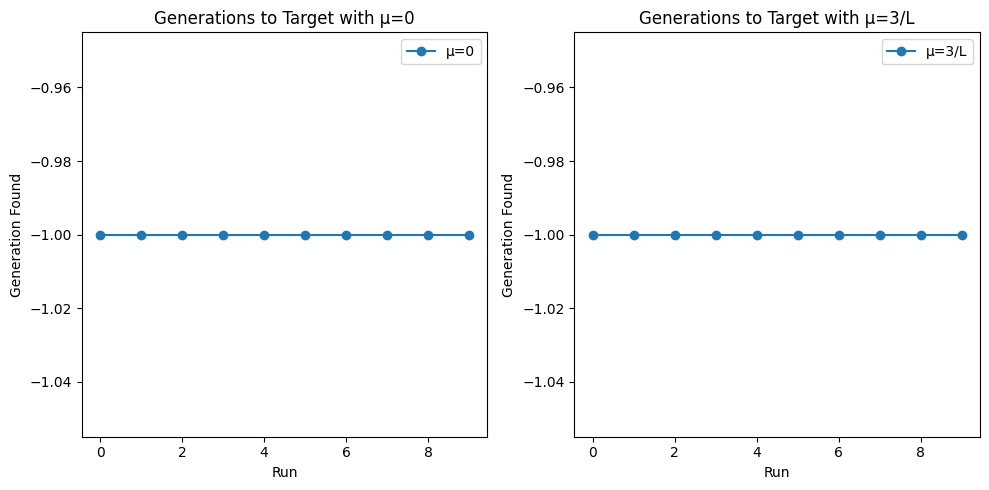

In [131]:
results_mu0 = []
results_mu3_15 = []

# Run the experiment 10 times for each mutation rate
for _ in range(10):
    result, _ = string_search(N=200, K=2, mu=0, L=15, generations=100, measure_diversity=False)
    results_mu0.append(result)

    result, _ = string_search(N=200, K=2, mu=3 / 15, L=15, generations=100, measure_diversity=False)
    results_mu3_15.append(result)

# Plot the results
plt.figure(figsize=(10, 5))

# Plot for µ=0
plt.subplot(1, 2, 1)
plt.plot(results_mu0, 'o-', label='µ=0')
plt.title('Generations to Target with µ=0')
plt.xlabel('Run')
plt.ylabel('Generation Found')
plt.legend()

# Plot for µ=3/L
plt.subplot(1, 2, 2)
plt.plot(results_mu3_15, 'o-', label='µ=3/L')
plt.title('Generations to Target with µ=3/L')
plt.xlabel('Run')
plt.ylabel('Generation Found')
plt.legend()

plt.tight_layout()
plt.show()

In [132]:
# Answer the questions for Task 2 based on the results
times_found_mu0 = [res for res in results_mu0 if res != -1]
times_found_mu3_15 = [res for res in results_mu3_15 if res != -1]

# If the target is found
if times_found_mu0:
    avg_gen_mu0 = sum(times_found_mu0) / len(times_found_mu0)
    print(f"The target was found with µ=0, on average, in {avg_gen_mu0} generations.")
else:
    print("The target was not found with µ=0 in the given number of generations.")

if times_found_mu3_15:
    avg_gen_mu3_L = sum(times_found_mu3_15) / len(times_found_mu3_15)
    print(f"The target was found with µ=3/15, on average, in {avg_gen_mu3_L} generations.")
else:
    print("The target was not found with µ=3/15 in the given number of generations.")

The target was not found with µ=0 in the given number of generations.
The target was not found with µ=3/15 in the given number of generations.


##### **Question 2: Repeat the experiment at both µ = 0 and µ = 3/L. Do you find the target? Explain your observations.**
In the experiments with both mutation rates µ = 0 and µ = 3/L, the target was not found within the given number of generations, as indicated by the results which consistently returned -1 for all runs. There are several possible explanations for this outcome:
- **Mutation Rate µ = 0**: A mutation rate of zero means that there is no introduction of new genetic information into the population after the initial random generation. The algorithm relies solely on the recombination of the initial genetic diversity to find the target. If the target sequence is not represented in the initial population, it is impossible for the algorithm to ever reach the target because no new mutations are introduced to move the population towards the target.

- **Mutation Rate µ = 3/15**: This higher mutation rate introduces a significant amount of randomness into the population. While it increases genetic diversity, it may also be too disruptive, preventing the algorithm from making consistent progress toward the target sequence. Instead of gradually building towards the target, high mutation rates can cause the offspring to diverge too much from their parents, potentially moving the population away from the target.

- **Generations Limit**: The limit of 100 generations may not be sufficient for the algorithm to converge on the target. Genetic algorithms can sometimes require a large number of generations to find the target sequence, especially if the fitness landscape is complex and the target sequence is highly specific.

Overall, the absence of finding the target sequence suggests that the balance between exploration (introducing new genetic variations) and exploitation (building on existing advantageous traits) is crucial. An optimal mutation rate would introduce enough new genetic variations to explore the solution space effectively but not so much as to prevent the population from converging on a solution.

#### 3. Analysis of Population Diversity
In this section, we incorporate population diversity analysis into the algorithm's execution. By measuring the mean pairwise Hamming distance among individuals in the population at regular intervals, we gain insights into the genetic diversity and its evolution over generations.

Population diversity value at 0 gen: 14.714942528735632
Population diversity value at 10 gen: 12.597701149425287
Population diversity value at 20 gen: 9.75632183908046
Population diversity value at 30 gen: 8.629885057471265
Target sequence has been found: ['t' 'i' 'P' 'A' 'Y' 't' 'M' 'F' 'Q' 'B' 'q' 'U' 'M' 'f' 'u']
Population diversity value at 0 gen: 14.682758620689656
Population diversity value at 10 gen: 11.255172413793103
Population diversity value at 20 gen: 4.714942528735632
Population diversity value at 30 gen: 1.0436781609195402
Population diversity value at 40 gen: 0.8091954022988506
Population diversity value at 50 gen: 0.7310344827586207
Population diversity value at 60 gen: 0.6183908045977011
Population diversity value at 70 gen: 0.6827586206896552
Population diversity value at 80 gen: 0.6068965517241379
Population diversity value at 90 gen: 0.5701149425287356
Population diversity value at 0 gen: 14.719540229885057
Population diversity value at 10 gen: 14.271264367816093
P

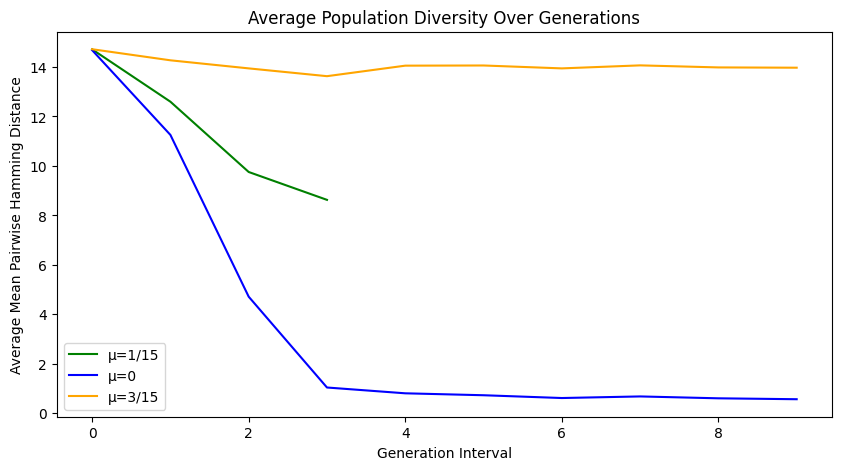

In [135]:
# For µ=1/15
_, diversity_data_mu1_15 = string_search(N=200, K=2, mu=1 / 15, L=15, generations=500, measure_diversity=True)

# For µ=0
_, diversity_data_mu0 = string_search(N=200, K=2, mu=0, L=15, generations=100, measure_diversity=True)

# For µ=3/15
_, diversity_data_mu3_15 = string_search(N=200, K=2, mu=3 / 15, L=15, generations=100, measure_diversity=True)

# Plot the average diversity data
plt.figure(figsize=(10, 5))
plt.plot(diversity_data_mu1_15, label='µ=1/15', color='green')
plt.plot(diversity_data_mu0, label='µ=0', color='blue')
plt.plot(diversity_data_mu3_15, label='µ=3/15', color='orange')
plt.xlabel('Generation Interval')
plt.ylabel('Average Mean Pairwise Hamming Distance')
plt.title('Average Population Diversity Over Generations')
plt.legend()
plt.show()

##### **Question 5: What do you conclude about the influence of µ on algorithm performance and population diversity?**
From the plot displaying the average mean pairwise Hamming distance over generations for three different mutation rates (µ=1/15, µ=0, µ=3/15), we can draw several conclusions regarding the influence of the mutation rate on algorithm performance and population diversity:

- With a **mutation rate of 0 (µ=0)**, the population diversity rapidly decreases and converges to a low diversity level. This is because without mutations, there is no new genetic information introduced into the population, and it quickly becomes homogeneous. This can lead to premature convergence where the population might get stuck in a local optimum and not progress towards the global optimum.

- For a **mutation rate of 1/15 (µ=1/15)**, there is a noticeable decline in diversity initially, followed by the algorithm successfully finding the target sequence by the 30th generation. This indicates that a moderate mutation rate not only maintains sufficient genetic diversity to avoid premature convergence but also effectively guides the population towards the target solution.

- With a **high mutation rate of 3/15 (µ=3/15)**, the diversity within the population remains high throughout the generations, which prevents convergence as the high rate of mutation continues to introduce significant variability within the population. This leads to continuous exploration without significant exploitation, making it difficult for the algorithm to stabilize on an optimal or near-optimal solution.

In conclusion, the mutation rate µ significantly influences the genetic algorithm's ability to maintain population diversity and drive performance towards finding a solution. A balanced mutation rate (as seen with µ=1/15) supports both the exploration of the search space and the exploitation of promising solutions, leading to successful optimization. On the other hand, too low or too high mutation rates can impede the algorithm's performance, either by rapid convergence to a local optimum or by excessive exploration that hinders convergence, respectively.

#### 6. Finding the Optimal Mutation Rate (µ)
The focus shifts to identifying an optimal mutation rate by gradually increasing µ from 0 in defined steps and observing the effect on the algorithm's efficiency and diversity. This exploration seeks to balance exploration and exploitation effectively.

Population diversity value at 0 gen: 14.717241379310344
Population diversity value at 10 gen: 10.50344827586207
Population diversity value at 20 gen: 3.5494252873563217
Population diversity value at 30 gen: 0.4160919540229885
Population diversity value at 40 gen: 0.12873563218390804
Population diversity value at 50 gen: 0.0
Population diversity value at 60 gen: 0.0
Population diversity value at 70 gen: 0.0
Population diversity value at 80 gen: 0.0
Population diversity value at 90 gen: 0.0
Population diversity value at 100 gen: 0.0
Population diversity value at 110 gen: 0.0
Population diversity value at 120 gen: 0.0
Population diversity value at 130 gen: 0.0
Population diversity value at 140 gen: 0.0
Population diversity value at 150 gen: 0.0
Population diversity value at 160 gen: 0.0
Population diversity value at 170 gen: 0.0
Population diversity value at 180 gen: 0.0
Population diversity value at 190 gen: 0.0
Population diversity value at 200 gen: 0.0
Population diversity value at 210

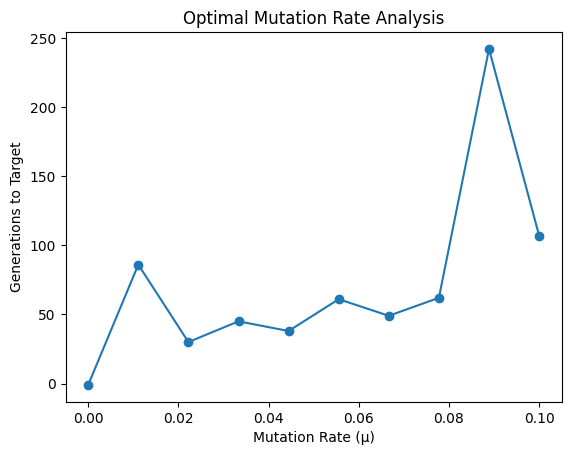

Optimal mutation rate (µ): 0.011111111111111112


In [145]:
# Exploring the optimal mutation rate by testing various µ values
mus = np.linspace(0, 1 / 10, 10)  # Range of mutation rates, starting from 0
gen_timing = []

for mu in mus:
    generation_found, _ = string_search(N=200, K=2, mu=mu, L=15, generations=1000, measure_diversity=True)
    gen_timing.append(generation_found)

# Plotting the relationship between µ and the generations needed to find the target
plt.plot(mus, gen_timing, marker='o')
plt.xlabel('Mutation Rate (µ)')
plt.ylabel('Generations to Target')
plt.title('Optimal Mutation Rate Analysis')
plt.show()

# Identifying the optimal mutation rate (ignoring the -1 values because the target was not found for these and they would appear first in the sorted list)
valid_gen_timing = [t for t in gen_timing if t != -1]
if valid_gen_timing:  # Ensure there are valid timings available
    optimal_mu_index = np.argmin(valid_gen_timing)
    optimal_mu = mus[optimal_mu_index]
    print(f"Optimal mutation rate (µ): {optimal_mu}")
else:
    print("No optimal mutation rate found (target not found in any run)")

#### 7. Experimenting with Tournament Selection Size K=5
By adjusting the tournament selection size to K=5, we repeat our experiments to observe how this change affects the algorithm's performance and population diversity. This step helps us understand the impact of selection pressure on the search process.

Population diversity value at 0 gen: 14.685057471264368
Population diversity value at 10 gen: 4.1402298850574715
Population diversity value at 20 gen: 0.7885057471264367
Population diversity value at 30 gen: 0.9011494252873563
Population diversity value at 40 gen: 0.9333333333333333
Population diversity value at 50 gen: 0.47586206896551725
Population diversity value at 60 gen: 0.967816091954023
Population diversity value at 70 gen: 0.38850574712643676
Population diversity value at 80 gen: 0.45977011494252873
Population diversity value at 90 gen: 0.6597701149425287
Population diversity value at 100 gen: 0.593103448275862
Population diversity value at 110 gen: 0.6183908045977011
Population diversity value at 120 gen: 0.39770114942528734
Population diversity value at 130 gen: 0.3310344827586207
Population diversity value at 140 gen: 0.5149425287356322
Population diversity value at 150 gen: 0.5149425287356322
Population diversity value at 160 gen: 0.5149425287356322
Population diversity va

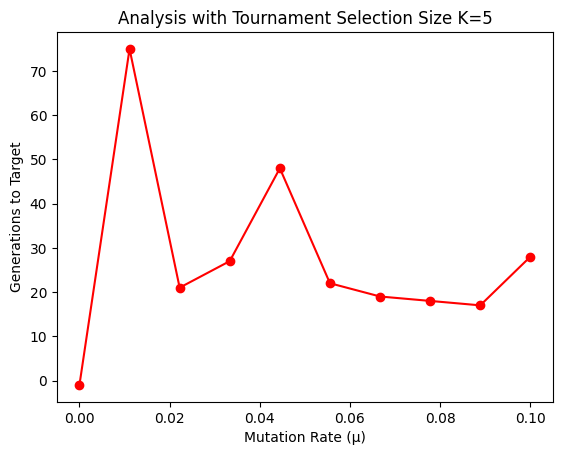

Optimal mutation rate (µ): 0.07777777777777778


In [147]:
# Testing the effect of increasing tournament selection size to K=5
mus = np.linspace(0, 1 / 10, 10)  # Range of mutation rates, starting from 0
gen_timing_k5 = []

for mu in mus:
    generation_found, _ = string_search(N=200, K=5, mu=mu, L=15, generations=1000, measure_diversity=True)
    gen_timing_k5.append(generation_found)

# Plotting the relationship for K=5
plt.plot(mus, gen_timing_k5, marker='o', color='red')
plt.xlabel('Mutation Rate (µ)')
plt.ylabel('Generations to Target')
plt.title('Analysis with Tournament Selection Size K=5')
plt.show()

# Identifying the optimal mutation rate (ignoring the -1 values because the target was not found for these and they would appear first in the sorted list)
valid_gen_timing = [t for t in gen_timing_k5 if t != -1]
if valid_gen_timing:  # Ensure there are valid timings available
    optimal_mu_index = np.argmin(valid_gen_timing)
    optimal_mu = mus[optimal_mu_index]
    print(f"Optimal mutation rate (µ): {optimal_mu}")
else:
    print("No optimal mutation rate found (target not found in any run)")

##### **Question 7: What do you find when adjusting the tournament selection size to K=5 and repeating the optimal mutation rate experiment?**

When the tournament selection size is increased to K=5, there's a noticeable impact on the genetic algorithm's performance in finding the target sequence. The mutation rates were tested within the same range as the previous experiment (0 to 1/10), but this time with a larger tournament size.

From the plot, it can be observed that the number of generations required to reach the target sequence varies significantly with different mutation rates, indicating the sensitivity of the algorithm's performance to the mutation rate. Interestingly, the optimal mutation rate found in this context is approximately 0.0778, which is different from the optimal mutation rate of 0.0111 found with a tournament selection size of K=2.

This suggests that increasing the tournament size affects the selective pressure within the population, making it more competitive. A higher K value implies a more stringent selection process, where only the fittest individuals are chosen to reproduce. This can lead to faster convergence in some cases but may also risk premature convergence to local optima if diversity is not maintained.

In comparison to the K=2 scenario, a larger K might require a slightly higher mutation rate to introduce enough variability to escape local optima. The observed optimal mutation rate for K=5 supports this, as it is higher than the one for K=2, indicating a need for greater genetic diversity to balance the increased selection pressure.


## Exercise 5.4: TSP-Memetic algorithms

In [165]:
# Load the coordinates from the text file
coordinates = np.loadtxt('file-tsp.txt')

In [166]:
def euclidean_distance(x1, x2):
    """Calculate the Euclidean distance between two points."""
    return np.sqrt(np.sum((x1 - x2) ** 2))


# Pre-allocate the distance matrix and compute pairwise city distances
distances_mat = np.zeros([50, 50], dtype=float)
for i in range(50):
    for j in range(50):
        distances_mat[i, j] = euclidean_distance(coordinates[i], coordinates[j])

In [167]:
def fitness_TSP_mat(route, coordinates_mat):
    """Calculate the total distance of a TSP route using a distance matrix."""
    distance = 0
    for j in range(len(route) - 1):
        distance += coordinates_mat[route[j], route[j + 1]]
    distance += coordinates_mat[route[-1], route[0]]
    return distance

In [168]:
def swap_2opt(route, v1, v2):
    """Perform the 2-opt swap on a route between indices i and k."""
    new_route = []
    new_route.extend(route[0:v1 + 1])
    new_route.extend(route[v1 + 1:v2 + 1][::-1])
    new_route.extend(route[v2 + 1:])
    return new_route


In [171]:
# Genetic algorithm for TSP with optional memetic strategy
def TSP_search_mat(N=200, K=2, mu=1 / 15, L=50, generations=1500, coordinates=distances_mat, memetic=True):
    """Genetic algorithm for TSP with optional memetic (local search) enhancement."""
    # Initial population: an array of N random permutations
    population = np.array([np.random.permutation(50) for _ in range(N)])

    # Main loop over generations
    for gen in range(generations):
        population_new = population.copy()

        for i in range(N // 2):
            # Tournament selection for parents
            parent1 = population[np.random.choice(N, K)]
            parent2 = population[np.random.choice(N, K)]
            parent1_max = parent1[
                np.argmin([fitness_TSP_mat(parent1[j], coordinates_mat=coordinates) for j in range(K)])]
            parent2_max = parent2[
                np.argmin([fitness_TSP_mat(parent2[j], coordinates_mat=coordinates) for j in range(K)])]
            # Crossover
            crossover_point_0 = 20
            crossover_point_1 = 40
            child1 = parent1_max.copy()
            child2 = parent2_max.copy()
            digits1 = set(parent1_max[crossover_point_0:crossover_point_1])
            digits2 = set(parent2_max[crossover_point_0:crossover_point_1])
            # Perform the 2-opt crossover
            x = 0
            y = 0
            for j in range(len(child1)):
                if x + crossover_point_1 < len(child1):
                    if parent2_max[j] not in digits1:
                        child1[x + crossover_point_1] = parent2_max[j]
                        x += 1
                else:
                    ind = (x + crossover_point_1) % 50
                    if parent2_max[j] not in digits1:
                        child1[ind] = parent2_max[j]
                        x += 1
                if y + crossover_point_1 < len(child2):
                    if parent1_max[j] not in digits2:
                        child2[y + crossover_point_1] = parent1_max[j]
                        y += 1
                else:
                    ind = (y + crossover_point_1) % 50
                    if parent1_max[j] not in digits2:
                        child2[ind] = parent1_max[j]
                        y += 1
            # Mutation
            if random.random() < mu:
                elem1 = np.random.randint(0, 50)
                elem2 = np.random.randint(0, 50)
                child1[elem1], child1[elem2] = child1[elem2], child1[elem1]
            if random.random() < mu:
                elem1 = np.random.randint(0, 50)
                elem2 = np.random.randint(0, 50)
                child2[elem1], child2[elem2] = child2[elem2], child2[elem1]

            # Local search with 2-opt algorithm
            if memetic:
                best_distance1 = fitness_TSP_mat(child1, coordinates_mat=coordinates)
                best_distance2 = fitness_TSP_mat(child2, coordinates_mat=coordinates)
                stop1 = False
                stop2 = False
                for v1 in child1[:-1]:
                    for v2 in range(v1 + 1, len(child1) - 1):
                        if not stop1:
                            lengthDelta1 = - coordinates[child1[v1], child1[v1 + 1]] - coordinates[
                                child1[v2], child1[v2 + 1]] + coordinates[child1[v1 + 1], child1[v2 + 1]] + coordinates[
                                               child1[v1], child1[v2]]
                            if lengthDelta1 < 0:
                                child1 = swap_2opt(child1, v1, v2)
                                best_distance1 += lengthDelta1
                            else:
                                stop1 = True
                        if not stop2:
                            lengthDelta2 = - coordinates[child2[v1], child2[v1 + 1]] - coordinates[
                                child2[v2], child2[v2 + 1]] + coordinates[child2[v1 + 1], child2[v2 + 1]] + coordinates[
                                               child2[v1], child2[v2]]
                            if lengthDelta2 < 0:
                                child2 = swap_2opt(child2, v1, v2)
                                best_distance2 += lengthDelta2
                            else:
                                stop2 = True
                        if stop1 and stop2:
                            break
            population_new[2 * i] = child1
            population_new[2 * i + 1] = child2

        population = population_new

    # Return the best route and its distance
    best_route_index = np.argmin([fitness_TSP_mat(route=individual, coordinates_mat=coordinates) for individual in population])
    best_route = population[best_route_index]
    best_distance = fitness_TSP_mat(route=best_route, coordinates_mat=coordinates)
    return best_route, best_distance

In [176]:
def run_experiments(repetitions, generations, coordinates, memetic):
    """Run the TSP genetic algorithm for a specified number of repetitions and return the results."""
    results = []
    for _ in range(repetitions):
        _, distance = TSP_search_mat(N=200, K=2, mu=1/15, L=50, generations=generations, coordinates=coordinates, memetic=memetic)
        results.append(distance)
        # Print the distance for each run and tell the run number
        print(f"Run {len(results)}: {distance}")
    return results

In [177]:
# Run experiments for simple EA
simple_EA_results = run_experiments(10, 1500, coordinates=distances_mat, memetic=False)

Run 1: 202.21838042925899
Run 2: 214.01998541273355
Run 3: 215.2853911844521
Run 4: 205.20472656145284
Run 5: 196.57351097347478
Run 6: 193.93553496376228
Run 7: 226.85368582227673
Run 8: 218.02049959369157
Run 9: 206.6855402509113
Run 10: 195.71911417005828


In [178]:
# Run experiments for MA
MA_results = run_experiments(10, 1500, coordinates=distances_mat, memetic=True)

Run 1: 190.49455833923133
Run 2: 195.90389731320224
Run 3: 207.92453803421344
Run 4: 215.42820594661833
Run 5: 201.85440623877437
Run 6: 205.5091146900241
Run 7: 209.55988445586556
Run 8: 229.59173462582476
Run 9: 221.73542475812283
Run 10: 188.46937564512444


In [185]:
# Output results
print("Simple EA Results for file-tsp.txt:", simple_EA_results)
print("\nMA Results for file-tsp.txt:", MA_results)

Simple EA Results for file-tsp.txt: [202.21838042925899, 214.01998541273355, 215.2853911844521, 205.20472656145284, 196.57351097347478, 193.93553496376228, 226.85368582227673, 218.02049959369157, 206.6855402509113, 195.71911417005828]

MA Results for file-tsp.txt: [190.49455833923133, 195.90389731320224, 207.92453803421344, 215.42820594661833, 201.85440623877437, 205.5091146900241, 209.55988445586556, 229.59173462582476, 221.73542475812283, 188.46937564512444]


In [181]:
# Importing the necessary libraries
import pandas as pd

# Load the TSP data from the file
# TSP data retrieved from: http://comopt.ifi.uni-heidelberg.de/software/TSPLIB95/tsp/
df = pd.read_csv("brazil58.tsp", skiprows=7, delimiter=" ", header=None)

# Extract the coordinates from the dataframe
df_inverted = df[df.columns[::-1]]
df_inverted.columns = df.columns
df_inverted[57][57] = 0
# Convert the dataframe to a numpy array
matrix = df_inverted.values

for i in range(matrix.shape[0]):
    matrix[i, i] = 0
    
matriz_inferior = np.triu(matrix, 1).T
matrix = matrix.astype(np.float64)
matrix[np.isnan(matrix)] = matriz_inferior[np.isnan(matrix)]

for i in range(matrix.shape[0]):
    for j in range(matrix.shape[0]):
        if matrix[i, j] != matrix[j, i]:
            print(f'The element ({i, j}) is not the same as ({j, i})')
            break_outer_loop = True
            break
    if 'break_outer_loop' in locals() and break_outer_loop:
        break

print('The matrix is completely symmetric')

The matrix is completely symmetric


C:\Users\User\AppData\Local\Temp\ipykernel_28200\2504920302.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_inverted[57][57] = 0


In [182]:
# Run experiments for simple EA
simple_EA_results_brazil58 = run_experiments(10, 1500, coordinates=matrix, memetic=False)

Run 1: 39281.0
Run 2: 37327.0
Run 3: 38521.0
Run 4: 39784.0
Run 5: 39858.0
Run 6: 35904.0
Run 7: 34716.0
Run 8: 37749.0
Run 9: 34358.0
Run 10: 36612.0


In [183]:
# Run experiments for MA
MA_results_brazil58 = run_experiments(10, 1500, coordinates=matrix, memetic=True)

Run 1: 34321.0
Run 2: 34476.0
Run 3: 32175.0
Run 4: 33137.0
Run 5: 34755.0
Run 6: 34166.0
Run 7: 36554.0
Run 8: 34486.0
Run 9: 33680.0
Run 10: 33603.0


In [190]:
# Output results
print("Simple EA Results for brazil58.tsp:", simple_EA_results_brazil58)
print("\nMA Results for brazil58.tsp:", MA_results_brazil58)

Simple EA Results for brazil58.tsp: [39281.0, 37327.0, 38521.0, 39784.0, 39858.0, 35904.0, 34716.0, 37749.0, 34358.0, 36612.0]

MA Results for brazil58.tsp: [34321.0, 34476.0, 32175.0, 33137.0, 34755.0, 34166.0, 36554.0, 34486.0, 33680.0, 33603.0]


In [189]:
# Calculate averages and standard deviations
simple_EA_avg_file_tsp = np.mean(simple_EA_results)
MA_avg_file_tsp = np.mean(MA_results)
simple_EA_std_file_tsp = np.std(simple_EA_results)
MA_std_file_tsp = np.std(MA_results)

simple_EA_avg_brazil58 = np.mean(simple_EA_results_brazil58)
MA_avg_brazil58 = np.mean(MA_results_brazil58)
simple_EA_std_brazil58 = np.std(simple_EA_results_brazil58)
MA_std_brazil58 = np.std(MA_results_brazil58)

# Output comparison
print(f"Simple EA average distance for file-tsp.txt: {simple_EA_avg_file_tsp}")
print(f"MA average distance for file-tsp.txt: {MA_avg_file_tsp}")
print(f"Simple EA average distance for brazil58.tsp: {simple_EA_avg_brazil58}")
print(f"MA average distance for brazil58.tsp: {MA_avg_brazil58}")

# Direct comparison
print("\nDirect comparison for file-tsp.txt:")
print(f"Improvement of MA over Simple EA: {simple_EA_avg_file_tsp - MA_avg_file_tsp}")
print("\nDirect comparison for brazil58.tsp:")
print(f"Improvement of MA over Simple EA: {simple_EA_avg_brazil58 - MA_avg_brazil58}")

Simple EA average distance for file-tsp.txt: 207.45163693620725
MA average distance for file-tsp.txt: 206.64711400470014
Simple EA average distance for brazil58.tsp: 37411.0
MA average distance for brazil58.tsp: 34135.3

Direct comparison for file-tsp.txt:
Improvement of MA over Simple EA: 0.8045229315071083

Direct comparison for brazil58.tsp:
Improvement of MA over Simple EA: 3275.699999999997


##### Question 1: Does addition of local search improve performance?
The addition of a local search algorithm, in this case, the 2-opt algorithm as part of a Memetic Algorithm (MA), has shown improvement in performance compared to the simple Evolutionary Algorithm (EA). 

###### Results for `file-tsp.txt`:
- Simple EA average distance: `207.45`
- MA average distance: `206.65`
- Improvement: `0.80` (MA over Simple EA)

###### Results for `brazil58.tsp`:
- Simple EA average distance: `37,411`
- MA average distance: `34,135.3`
- Improvement: `3,275.7` (MA over Simple EA)

The numerical results indicate that the memetic approach generally leads to better solutions, exemplified by shorter total distances in the TSP. The improvement is more pronounced for the `brazil58.tsp` dataset, where the MA achieves a substantial reduction in the average distance compared to the simple EA. 

This outcome suggests that the incorporation of local search, which allows for the refinement of solutions within the genetic algorithm, can enhance the algorithm's ability to find better solutions. The local search helps to exploit the genetic diversity present in the population and refine the solutions, leading to improved performance in finding shorter routes for the TSP.

##### Question 2: Is the simple EA with the same number of generations a fair baseline for this question?
The comparison between a simple EA and an MA may not be fair if they are both run for the same number of generations. This is because the MA includes a local search component—in this case, the 2-opt algorithm—which adds an extra layer of optimization that the simple EA does not have. The local search in the MA can significantly improve the quality of solutions within the same generation count, making the algorithms not directly comparable.

A more balanced approach might be to adjust the number of generations for the simple EA so that the total computational effort (considering time or resources used) is roughly equal to that of the MA. Another way would be to compare the quality of the solutions obtained by both algorithms over the same computational time, regardless of the number of generations. This takes into account the extra computation required for the local search in the MA and ensures that both algorithms have an equal opportunity to optimize their solutions given the same computational budget.